In [166]:
from understatscraper import Understat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mplsoccer.pitch import Pitch, VerticalPitch

In [4]:
understat = Understat()

In [5]:
# Getafe match ids

ids = [17136,17154,17162,17167,17184,17187,17205,17214,17221,17232,17244,17253,17265,17269,17279,17289,17296,17310,
      17323,17333,17342,17352,17361]
ids = [str(x) for x in ids]

In [6]:
# creating dataframe

df = pd.DataFrame()
for x in ids:
    df_getafe = understat.single_match(x)
    df = df.append(df_getafe)

In [7]:
enes = df[df.player == 'Enes Ünal']

In [8]:
enes[['X','Y','xG']] = enes[['X','Y','xG']].apply(pd.to_numeric,axis=1)

In [9]:
enes['date'] = pd.to_datetime(enes['date'])

In [10]:
enes['xg_cumulative'] = enes['xG'].cumsum()

In [11]:
enes['goal'] = np.where(enes['result']=='Goal',1,0)
enes['goal_cumulative'] = enes['goal'].cumsum()

### xG flow chart

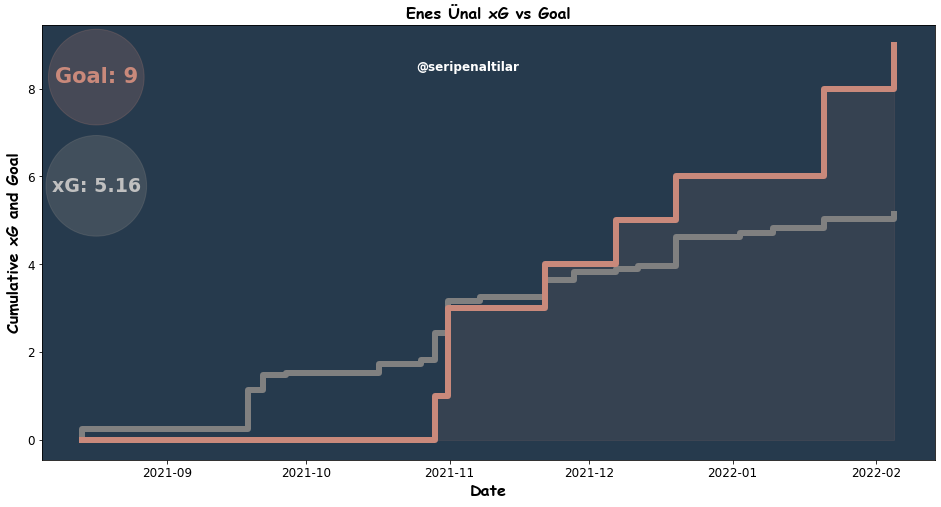

In [157]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=enes['date'],y=enes['xg_cumulative'],c="#808080",linewidth=6)
ax.step(x=enes['date'],y=enes['goal_cumulative'],c="#c9897b",linewidth=6)

ax.set_facecolor(color='#263a4d')

plt.fill_between(enes['date'],enes['goal_cumulative'],alpha=0.1,color="#c9897b",step='pre') 
#step is to fill below entire line


plt.text(0.061, 0.88, "Goal: {}".format(round(enes['goal_cumulative'].max(),2)), size=21,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

#transform is to normalize the circle with the figure

plt.text(0.061, 0.63, "xG: {}".format(round(enes['xg_cumulative'].max(),2)), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'black',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Enes Ünal xG vs Goal',fontdict=font)
plt.grid(False)

plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Shotmap

In [161]:
enes[['X','Y']] = enes[['X','Y']]*100

In [164]:
enes['result'].value_counts()

MissedShots    18
BlockedShot    15
Goal            9
SavedShot       8
ShotOnPost      1
Name: result, dtype: int64

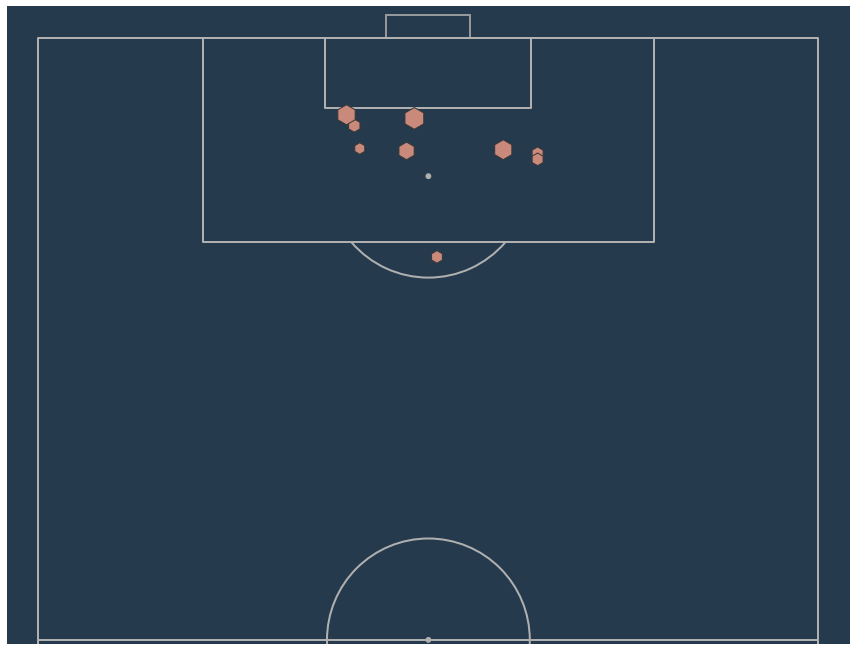

In [179]:
pitch = VerticalPitch(pad_bottom=0.5,
                     half=True,
                     goal_type='box',
                     goal_alpha=0.8,
                     pitch_type='opta',
                     pitch_color='#263a4d'
                     )

fig,ax = pitch.draw(figsize=(12,10))

re = pitch.scatter(enes[enes['result']=='Goal']['X'],enes[enes['result']=='Goal']['Y'],s=(enes[enes['result']=='Goal']['xG']*720)+100,
                   c='#c9897b',marker='h',edgecolors='#383838',ax=ax,label='Goal')

re1 = pitch.scatter(enes[enes['result']!='Goal']['X'],enes[enes['result']!='Goal']['Y'],s=(enes[enes['result']!='Goal']['xG']*720)+100,
                   c='#c9897b',marker='h',edgecolors='#383838',ax=ax,label='Goal')